# How to deal with large dataset (tabular data)?



Today , we have to deal with large amount of data ,you may have seen that most of the kaggle competitions dataset size is huge ( some are of even 20GB or 50 GB), and obviously we don't have that much computation power and reading data with normal  ```read_csv``` using padas is not feasible .So, many *AI-researchers/Kagglers/Data-scientists* come up with different techniques to dealing with large datasets.

So today , we are gonna discuss these techniques.
Lets get started!!

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("../input/uk-housing-prices-paid/price_paid_records.csv")

## Method 1 - Changing the size of datatypes

In [ ]:
train.info(memory_usage="deep")

In [ ]:
del train

In [ ]:
dtypes = {
    "Transaction unique identifier": "category",
    "Price": "int32",
    "Property Type": "category",
    "Old/New": "category",
    "Duration": "category",
    "Town/City": "category",
    "District": "category",
    "Country": "category",
    "County": "category",
    "PPDCategory Type": "category",
    "Record Status - monthly file only": "category"
}

In [ ]:

train = pd.read_csv("../input/uk-housing-prices-paid/price_paid_records.csv", dtype=dtypes)
train["Date of Transfer"] = pd.to_datetime(train["Date of Transfer"])

In [ ]:
train.info(memory_usage="deep")

In [ ]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    object_cols = [ c for c in df if df[c].dtype =='object']
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    df[object_cols] = df[object_cols].astype("category")
    return df

In [ ]:
del train

## Method 2 - Reading data in chunks 

In [ ]:
data_chunk=pd.read_csv('../input/uk-housing-prices-paid/price_paid_records.csv',chunksize=100000)
data_chunk

In [ ]:
#storing the chunks after iterating from chunk object
chunk_data=[chunk for chunk in data_chunk]

#concatnating dataframes to make it a complete dataset
train=pd.concat(chunk_data)

In [ ]:
train.info()

In [ ]:
del train

## Method 3 - Use Dask


##### - **Dask** is a flexible library for parallel computing in Python .
##### - **Dask** = Features of pandas +  ( performance and scalability) .



Use when - 
* Manipulating large datasets, even when those datasets don’t fit in memory
* Accelerating long computations by using many cores
* Distributed computing on large datasets with standard Pandas operations like groupby, join, and time series computations


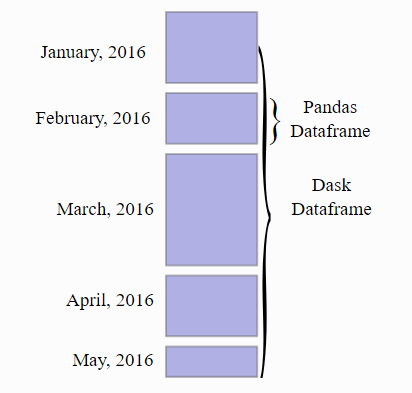!

In [ ]:
# import gc
# gc.collect()

In [ ]:
import dask.dataframe as dd

In [ ]:
train = dd.read_csv("../input/uk-housing-prices-paid/price_paid_records.csv", dtype=dtypes)

In [ ]:
train.info(memory_usage="deep")

In [ ]:
train.Price.mean().compute()

In [ ]:
train.Price[train.Price>10000].compute()

For more information - 

## Method 4 : Using Datatable 


Datatable is a python library for manipulating tabular data. It supports out-of-memory datasets, multi-threaded data processing, and flexible API. 

- Similar to the R’s data.table
- It is a toolkit for performing big data (up to 100GB) operations on a single-node machine, at the maximum possible speed.



In [ ]:
# Install datatable

# !pip install datatable

In [ ]:
import datatable as dt

In [ ]:
train = dt.fread("../input/uk-housing-prices-paid/price_paid_records.csv")

## Method 5 : Using cuDF

cuDf is GPU equivalent to pandas . cuDF is a package within the RAPIDS ecosystem that allows data scientists to easily migrate their existing Pandas workflows from CPU to GPU, where computations can leverage the immense parallelization that GPUs provide.

In [ ]:
# !pip3 install cudf

In [ ]:
%%time
import cudf
train = cudf.read_csv('../input/uk-housing-prices-paid/price_paid_records.csv')

In [ ]:
train.info()

## Method 6: Always delete unused variables ( this will save lot of space )

In [ ]:
import gc 
gc.collect()

## Method 7: Use Debug mode when doing feature engineering

In [ ]:
 debug = True
if debug:
    train = pd.read_csv('../input/uk-housing-prices-paid/price_paid_records.csv',nrows=10000 , dtype=dtypes)
else:
    train = pd.read_csv('../input/uk-housing-prices-paid/price_paid_records.csv', dtype=dtypes) 

## Method 8: Saving dataframes/objects as pickle files for faster loading

In [ ]:
train.to_pickle("train.pkl")

## References - 
1. https://www.kaggle.com/elvinagammed/deal-with-large-dfs-reduce-the-size-of-df-to-36?scriptVersionId=43054943
2. https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets